<a href="https://colab.research.google.com/github/SinSham/EDA-Python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the libraries required for EDA and reading the csv file. The data set used here is of Sugarcane Production in different countries.

In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('/content/List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [308]:
df.tail()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"
102,102,Syria,Asia,1,0,0,"83.034,2"


In [309]:
df.shape

(103, 7)

In [310]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

The unnamed column having indices is dropped.

In [311]:
df = df.drop(df.columns[0], axis=1)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


Renaming the column names for easier working.

In [312]:
df = df.rename(columns={'Production (Tons)' : 'Prdtn(Tons)', 'Production per Person (Kg)': 'Prdtn_pp(Kg)', 'Acreage (Hectare)' : 'Acreage', 'Yield (Kg / Hectare)': 'Yield'})

Finding the duplicate rows in data set.

In [313]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


The count of rows in each column before removing duplicate rows.

In [314]:
df.count()

Country         103
Continent       103
Prdtn(Tons)     103
Prdtn_pp(Kg)    103
Acreage         102
Yield           102
dtype: int64

In [315]:
df = df.drop_duplicates()
df.head()

,Country,Continent,Prdtn(Tons),Prdtn_pp(Kg),Acreage,Yield
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


The count of rows in each column after removing duplicates

In [316]:
df.count()

Country         103
Continent       103
Prdtn(Tons)     103
Prdtn_pp(Kg)    103
Acreage         102
Yield           102
dtype: int64

Removing null values

In [317]:
print(df.isnull().sum())

Country         0
Continent       0
Prdtn(Tons)     0
Prdtn_pp(Kg)    0
Acreage         1
Yield           1
dtype: int64


In [318]:
df = df.dropna()
df.count()

Country         102
Continent       102
Prdtn(Tons)     102
Prdtn_pp(Kg)    102
Acreage         102
Yield           102
dtype: int64

In [319]:
print(df.isnull().sum())

Country         0
Continent       0
Prdtn(Tons)     0
Prdtn_pp(Kg)    0
Acreage         0
Yield           0
dtype: int64


In [320]:
df.head()

,Country,Continent,Prdtn(Tons),Prdtn_pp(Kg),Acreage,Yield
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


The code uses the replace() function on the specified columns of the DataFrame to remove any non-numeric characters. It uses the regular expression [^0-9] to match any character that is not a digit. The matching characters are replaced with an empty string, effectively removing them from the values. Then we convert the data into float type.

In [329]:
columns_to_clean = ['Prdtn(Tons)', 'Prdtn_pp(Kg)', 'Acreage', 'Yield']

df.loc[:, columns_to_clean] = df[columns_to_clean].replace('[^0-9]', '', regex=True)

# Convert the values to the appropriate data type
df.loc[:, columns_to_clean] = df[columns_to_clean].astype(float)



In [322]:
df.head()

,Country,Continent,Prdtn(Tons),Prdtn_pp(Kg),Acreage,Yield
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


<Axes: xlabel='Prdtn_pp(Kg)'>

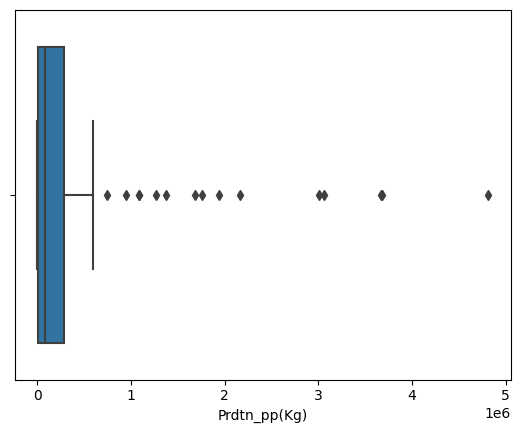

In [323]:
sns.boxplot(x=df['Prdtn_pp(Kg)'])

<Axes: xlabel='Prdtn(Tons)'>

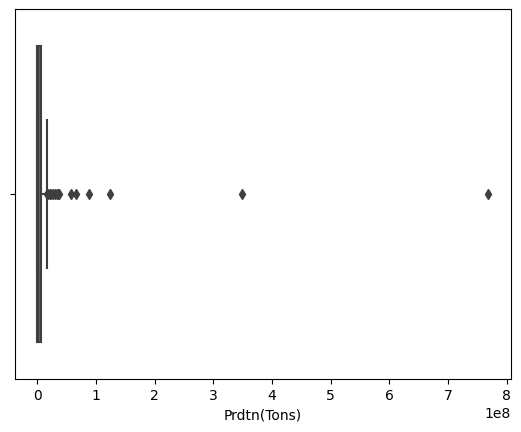

In [324]:
sns.boxplot(x=df['Prdtn(Tons)'])

<Axes: xlabel='Continent', ylabel='Count'>

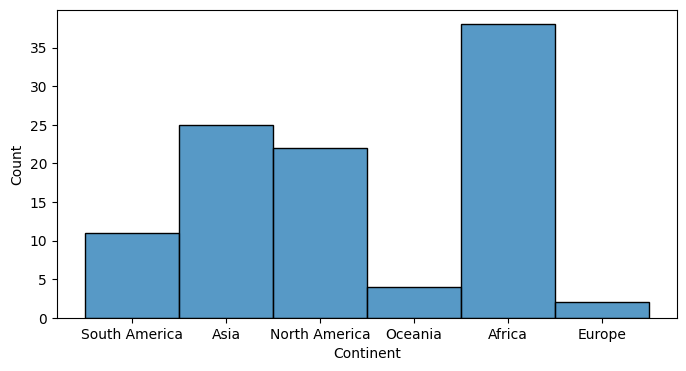

In [330]:
plt.figure(figsize=(8,4))
sns.histplot(df['Continent'])

<Axes: xlabel='Prdtn(Tons)', ylabel='Acreage'>

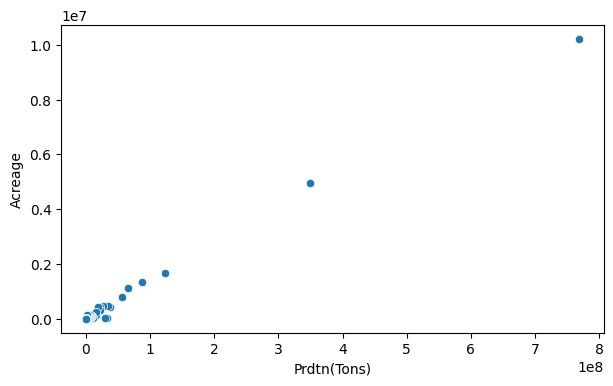

In [326]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df['Prdtn(Tons)'], y=df['Acreage'])

<Axes: xlabel='Prdtn(Tons)', ylabel='Acreage'>

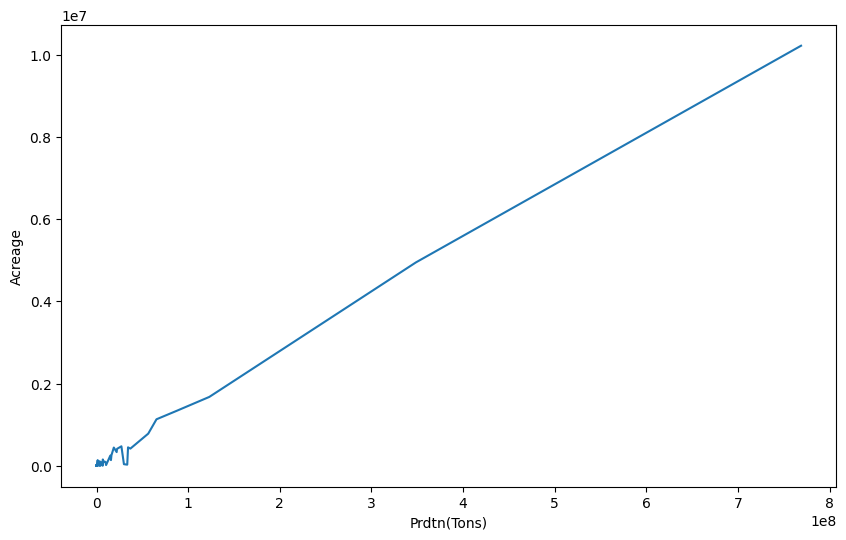

In [327]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Prdtn(Tons)'],y=df['Acreage'])

<Axes: >

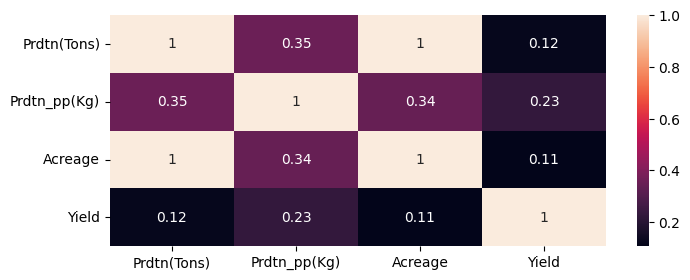

In [328]:
plt.figure(figsize=(8,3))
c= df.corr(numeric_only = True)
sns.heatmap(c,annot=True)